In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")



In [3]:
data = pd.read_csv("bitcoin.csv")

In [4]:
data = pd.DataFrame(data)

In [5]:
data.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-05-22,2024-05-23,70144.69,70599.97,69048.60,69224.99,1.161000e+11,1.375970e+12
1,2024-05-21,2024-05-22,71369.73,71739.14,69266.38,70104.40,1.403673e+11,1.391372e+12
2,2024-05-20,2024-05-21,66222.45,71456.55,66139.62,71418.17,9.769064e+10,1.332128e+12
3,2024-05-19,2024-05-20,66972.63,67598.31,66005.33,66347.05,8.441685e+10,1.317072e+12
4,2024-05-18,2024-05-19,66939.82,67376.41,66640.01,66914.58,9.377570e+10,1.318743e+12


In [6]:
null_values = data.isnull()

In [7]:
null_counts = null_values.sum()

In [8]:
null_counts

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [9]:
data.drop(columns = ['Open','High','Low','Volume','Market Cap'], inplace=True)

In [10]:
data

,Start,End,Close
0,2024-05-22,2024-05-23,69224.9900
1,2024-05-21,2024-05-22,70104.4000
2,2024-05-20,2024-05-21,71418.1700
3,2024-05-19,2024-05-20,66347.0500
4,2024-05-18,2024-05-19,66914.5800
...,...,...,...
5054,2010-07-21,2010-07-22,0.0792
5055,2010-07-20,2010-07-21,0.0747
5056,2010-07-19,2010-07-20,0.0808
5057,2010-07-18,2010-07-19,0.0858


In [11]:
data_reversed = data.iloc[::-1].reset_index(drop=True)
data=data_reversed

In [12]:
data

,Start,End,Close
0,2010-07-17,2010-07-18,0.0500
1,2010-07-18,2010-07-19,0.0858
2,2010-07-19,2010-07-20,0.0808
3,2010-07-20,2010-07-21,0.0747
4,2010-07-21,2010-07-22,0.0792
...,...,...,...
5054,2024-05-18,2024-05-19,66914.5800
5055,2024-05-19,2024-05-20,66347.0500
5056,2024-05-20,2024-05-21,71418.1700
5057,2024-05-21,2024-05-22,70104.4000


In [13]:
data.drop(columns = ['End','Start'], inplace=True)

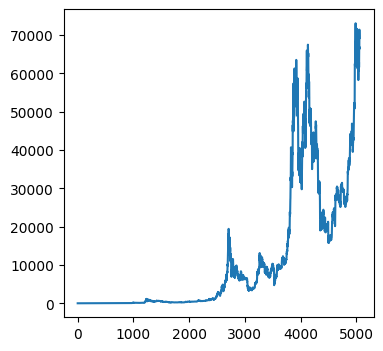

In [14]:
# Plot the data
plt.figure(figsize=(4, 4))
plt.plot(data)
plt.show()

In [15]:
# Assuming 'data' is your DataFrame
data = data.iloc[1804:].reset_index(drop=True)

In [16]:
data

,Close
0,242.694
1,243.599
2,251.083
3,248.987
4,257.022
...,...
3250,66914.580
3251,66347.050
3252,71418.170
3253,70104.400


In [17]:
data.shape

(3255, 1)

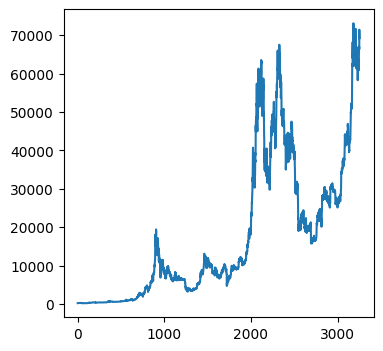

In [18]:
# Plot the data
plt.figure(figsize=(4, 4))
plt.plot(data)
plt.show()

In [19]:
train_data = data[:-100]
test_data = data[-100:]

In [20]:
train_data.shape

(3155, 1)

In [21]:
test_data.shape

(100, 1)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
train_data_scale = scaler.fit_transform(train_data)

In [24]:
base_days = 100

In [25]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [26]:
x[0]

array([[4.65160305e-04],
       [4.78609828e-04],
       [5.89832184e-04],
       [5.58682791e-04],
       [6.78093751e-04],
       [7.68525075e-04],
       [7.02302893e-04],
       [6.55459912e-04],
       [6.66056056e-04],
       [7.36825812e-04],
       [8.97982309e-04],
       [8.56771781e-04],
       [8.21669269e-04],
       [8.79821737e-04],
       [8.62939242e-04],
       [1.09556398e-03],
       [1.21509383e-03],
       [1.48063646e-03],
       [1.20247654e-03],
       [1.13490198e-03],
       [1.10997949e-03],
       [9.91162984e-04],
       [1.01280111e-03],
       [9.41169397e-04],
       [9.22518401e-04],
       [9.95799725e-04],
       [9.63580315e-04],
       [9.78842923e-04],
       [9.61024163e-04],
       [1.14447269e-03],
       [1.14970388e-03],
       [1.20723217e-03],
       [1.22239075e-03],
       [1.23374483e-03],
       [1.16211311e-03],
       [1.13640297e-03],
       [1.08646883e-03],
       [1.04949379e-03],
       [1.05857407e-03],
       [1.04380189e-03],


In [27]:
y[0]

0.00040721589517374096

In [28]:
x, y = np.array(x), np.array(y)

In [29]:
x

array([[[4.65160305e-04],
        [4.78609828e-04],
        [5.89832184e-04],
        ...,
        [3.66911910e-04],
        [3.88728374e-04],
        [3.85280540e-04]],

       [[4.78609828e-04],
        [5.89832184e-04],
        [5.58682791e-04],
        ...,
        [3.88728374e-04],
        [3.85280540e-04],
        [4.07215895e-04]],

       [[5.89832184e-04],
        [5.58682791e-04],
        [6.78093751e-04],
        ...,
        [3.85280540e-04],
        [4.07215895e-04],
        [3.98358530e-04]],

       ...,

       [[5.15787818e-01],
        [5.12993586e-01],
        [5.17298177e-01],
        ...,
        [6.55632988e-01],
        [6.70315260e-01],
        [6.96737851e-01]],

       [[5.12993586e-01],
        [5.17298177e-01],
        [5.17339194e-01],
        ...,
        [6.70315260e-01],
        [6.96737851e-01],
        [7.06639970e-01]],

       [[5.17298177e-01],
        [5.17339194e-01],
        [5.17294461e-01],
        ...,
        [6.96737851e-01],
        [7.0663

In [30]:
y

array([4.07215895e-04, 3.98358530e-04, 4.28690548e-04, ...,
       7.06639970e-01, 7.14211086e-01, 7.40183972e-01])

In [31]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [32]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [36]:
model.fit(x, y, epochs = 50, verbose =1 )

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 113ms/step - loss: 0.0404
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - loss: 0.0062
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - loss: 0.0055
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0043
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0042
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - loss: 0.0045
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0037
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 0.0037
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - loss: 0.0036
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0037
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0030
Epoch 12/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - loss: 0.0031
Epoch 13/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.0033
Epoch 14/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0031
Epoch 15/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [37]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [38]:
test_data

,Close
0,35022.44
1,35019.43
2,35423.24
3,35680.29
4,36775.23
...,...
195,66914.58
196,66347.05
197,71418.17
198,70104.40


In [39]:
test_data_scale = scaler.transform(test_data)

In [40]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [41]:
x[0]

array([[0.51733919],
       [0.51729446],
       [0.52329562],
       [0.52711573],
       [0.54338802],
       [0.55150098],
       [0.54794957],
       [0.547249  ],
       [0.53976854],
       [0.52503143],
       [0.55956356],
       [0.53518916],
       [0.53950594],
       [0.54018065],
       [0.55250219],
       [0.55365216],
       [0.53100792],
       [0.55339774],
       [0.55110359],
       [0.55729186],
       [0.55840705],
       [0.55383377],
       [0.55072359],
       [0.55827404],
       [0.55873653],
       [0.55735457],
       [0.57136942],
       [0.58328733],
       [0.59043668],
       [0.62097275],
       [0.65203119],
       [0.6465154 ],
       [0.63961171],
       [0.65372018],
       [0.64631804],
       [0.64723097],
       [0.60945996],
       [0.61379189],
       [0.63451248],
       [0.63595849],
       [0.62034292],
       [0.6246704 ],
       [0.61284285],
       [0.63093372],
       [0.62549595],
       [0.64549621],
       [0.6485199 ],
       [0.649

In [42]:
x, y = np.array(x), np.array(y)

In [43]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [44]:
pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step


In [45]:
pred = scaler.inverse_transform(pred)

In [46]:
pred

array([[42030.703],
       [43031.43 ],
       [43882.688],
       [44540.438],
       [44952.74 ],
       [45032.098],
       [44884.36 ],
       [44576.906],
       [44299.113],
       [44085.03 ],
       [43879.242],
       [43617.73 ],
       [43444.887],
       [43455.465],
       [43958.67 ],
       [45060.7  ],
       [46849.49 ],
       [48903.324],
       [50881.87 ],
       [52297.43 ],
       [53121.88 ],
       [54076.598],
       [54486.582],
       [54605.35 ],
       [54679.062],
       [54973.316],
       [55442.496],
       [55955.062],
       [56857.71 ],
       [57754.5  ],
       [58584.418],
       [58824.04 ],
       [58247.05 ],
       [56700.582],
       [55124.54 ],
       [54109.53 ],
       [53033.004],
       [52802.168],
       [53180.02 ],
       [53471.156],
       [53561.33 ],
       [53997.66 ],
       [55018.523],
       [56338.246],
       [57347.93 ],
       [57950.996],
       [57964.223],
       [57510.348],
       [57090.047],
       [56682.99 ],


In [47]:
#future Bitcoin Price

In [48]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

In [49]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [50]:
z

array([[57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246],
       [57159.18238246]])

In [51]:
model.save('Bitcoin.keras')